In [9]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
import os

# Ensure you are in the correct directory
os.chdir(r'G:\Programming\10_Academy\solar_radiation_EDA')

# Add the root directory to the Python path
sys.path.append(os.getcwd())
from scripts.analysis_script import *
import scripts.analysis_script as analysis_script

df_benin =pd.read_csv('data/benin-malanville.csv')
df_sierraleone =pd.read_csv('data/sierraleone-bumbuna.csv')
df_togo =pd.read_csv('data/togo-dapaong_qc.csv')
# print(df.head())
#copy of the dataframes
df_benin_cleaned=None
df_sierraleone_cleaned=None
df_togo_cleaned=None

In [ ]:
#time series analysis
line_graph_over_a_day(df_benin_cleaned)
line_graph_over_a_day(df_sierraleone_cleaned)
line_graph_over_a_day(df_togo_cleaned)

In [ ]:
line_graph_over_a_month(df_benin_cleaned)
line_graph_over_a_month(df_sierraleone_cleaned)
line_graph_over_a_month(df_togo_cleaned)

1 2 3 4 5 6 7 8 9 10 11 yyyyyyhkhhhjhj---------------------


,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.882376,0.849989,0.920127,0.874338
DNI,0.882376,1.000000,0.546602,0.790340,0.756007
DHI,0.849989,0.546602,1.000000,0.825012,0.777829
TModA,0.920127,0.790340,0.825012,1.000000,0.983443
TModB,0.874338,0.756007,0.777829,0.983443,1.000000


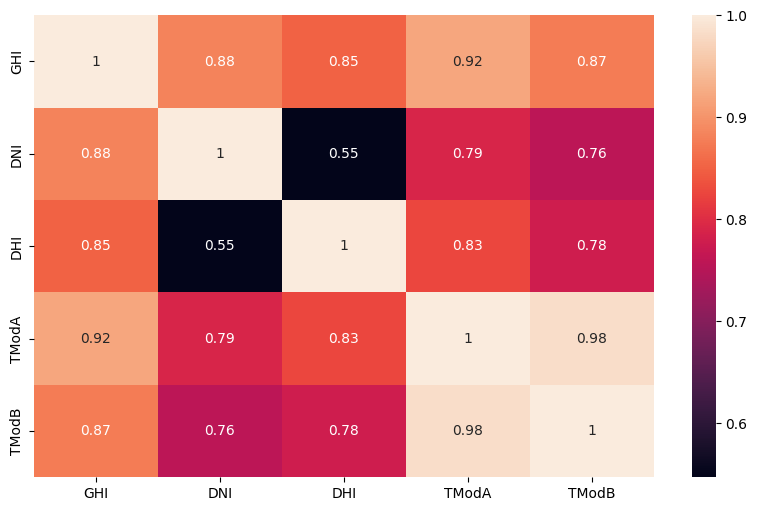

In [13]:
correlation(df_benin)